# D2D Classification for resource alllocation

In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Dense, Activation,Dropout
from tensorflow.keras.models import Model

## Importing The Dataset

In [ ]:
df = pd.read_csv('/content/vr_data.csv')

In [ ]:
df

,2.2096,2.1123,1.1908,1.3525,6.5403,1.9183,3.3168,6.1588,1.9111,2.4607,2.7811,3.0452,2.5035,1.6854,2.3536,2.6112,2.484,0.87964,5.022,2.3226,3.7625,3.9964,5.5825,3.6917,2.9376,5.6924,0.23376,2.3531,1.2728,1.3592,1.8448e-13,7.6782e-15,5.8468e-13,2.1994e-09,3.1986e-15,1.2168e-16,8.078e-15,1.719e-17,5.5803e-15,1.2438e-16,...,1.336e-12,1.1562e-16,1.4545e-14,1.0876e-14,7.8243e-16,2.2805e-13,2.3438e-13,4.8311e-17,1.4615e-14,-0,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29
0,0.43350,2.749000,1.5975,1.130700,4.22360,0.848570,2.03450,4.22170,0.38870,2.28450,1.169600,1.850700,1.25800,3.33170,1.85270,3.67310,2.4003,2.4472,5.26830,1.27610,4.4679,5.15580,3.3439,4.57700,1.88530,1.566200,1.8316,0.61163,4.734300,0.64428,1.614200e-14,7.135000e-15,5.014900e-13,9.363100e-10,1.002200e-15,4.931400e-16,2.014700e-15,7.928500e-17,2.446400e-15,9.475100e-18,...,3.342500e-12,1.218100e-15,3.504900e-15,1.789100e-15,3.111600e-16,1.517700e-12,6.209800e-14,3.592700e-16,2.207900e-14,7.884300e-14,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,1,0
1,0.87538,0.057564,1.2895,0.712780,4.45960,1.605000,0.90355,3.30540,1.14530,3.13750,3.766200,0.076489,2.86370,3.28560,2.03920,1.48940,5.0336,3.0252,2.63300,1.79230,2.3404,2.57360,2.8610,4.99520,0.83764,5.057800,2.2133,3.93410,0.577980,1.65560,4.047300e-13,4.595600e-14,2.928300e-14,1.509900e-10,8.762100e-18,9.456800e-17,1.014000e-15,5.911800e-16,1.526400e-14,3.893700e-17,...,2.905600e-13,4.528000e-16,4.433400e-15,5.597800e-15,2.367200e-15,3.305400e-14,6.477700e-14,2.365800e-16,1.325900e-15,7.625400e-14,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,1
2,0.37437,3.169600,2.0344,0.009997,4.33000,0.761020,1.73800,4.22150,4.01470,5.25390,3.086200,2.034600,0.22662,2.55420,0.10895,2.63260,3.7011,3.1688,1.16120,1.74410,3.7868,5.31410,4.8653,3.29890,0.81334,2.681500,2.0676,2.34370,1.166100,2.31340,4.550400e-13,5.325600e-15,1.244000e-13,1.883600e-10,4.256400e-15,2.087100e-16,1.419300e-15,6.331400e-16,5.876500e-15,2.323800e-16,...,1.502900e-13,3.341500e-16,6.636700e-15,1.684400e-15,1.292800e-15,7.036000e-13,5.566300e-14,1.230600e-15,1.157500e-14,2.280300e-13,0,1,0,0,0,1,0,1,0,1,0,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,1
3,2.73000,3.723000,1.6497,1.658100,3.76020,0.003798,1.67810,3.95040,3.71860,4.58320,2.160700,4.720600,3.11070,2.84010,1.97800,0.71302,1.9320,2.2046,2.62700,4.11160,5.2401,1.08980,4.6604,4.96350,1.32410,2.667700,2.3929,1.51120,1.313300,0.43596,1.109000e-13,3.663600e-15,7.213200e-13,5.806300e-09,2.692500e-15,8.890700e-16,3.692900e-15,1.660900e-16,8.722300e-15,8.662800e-17,...,9.554800e-13,5.260000e-16,1.024700e-15,6.279800e-15,2.290200e-15,5.730900e-13,1.154100e-13,2.452800e-16,2.961100e-15,2.305900e-14,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0
4,4.27220,1.577000,2.1364,1.523200,0.77398,2.664400,3.18910,1.88560,0.35863,3.76520,4.432100,1.875400,4.01320,1.98820,1.01070,1.67270,1.6709,0.1933,3.74260,2.38420,3.8870,3.49220,4.9911,1.97570,0.66438,4.192900,2.8858,2.20000,3.609000,1.65350,1.647500e-13,7.184100e-15,2.119100e-13,3.764400e-10,5.382400e-15,2.053700e-16,2.828600e-17,2.939400e-17,1.373600e-15,9.996700e-17,...,7.718400e-14,2.999400e-16,2.030700e-15,2.670500e-15,4.852900e-17,1.057100e-13,3.594200e-14,1.051000e-16,8.197300e-15,-0.000000e+00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,3.29060,2.420100,3.9382,4.754600,1.54960,3.520700,3.05820,3.42760,6.43440,0.35002,1.957100,0.319160,6.13650,1.33810,4.51820,3.85940,1.6124,1.7546,2.27470,1.36270,3.6275,3.24440,3.2887,1.09780,5.43860,0.240640,3.8861,2.92120,3.103400,4.22960,2.276700e-17,1.458300e-16,4.

In [ ]:
# Dropping the rows where C = 0
#df.drop(df.loc[df['-0']==0].index, inplace=True)
#df.iloc[:, 30:61] = df.iloc[:, 30:61] * 10000000000

In [ ]:
X = df.iloc[:,:-30].values
#y = df[['0.24','0.28']].values
y = df.iloc[:,-30:].values
#from sklearn.preprocessing import MinMaxScaler
#minmaxscaler = MinMaxScaler(feature_range=(-1, 1))
#X = minmaxscaler.fit_transform(X)

#from sklearn.preprocessing import StandardScaler
# define standard scaler
#scaler = StandardScaler()
# transform data
#X = scaler.fit_transform(X)

#from sklearn.preprocessing import Normalizer
#scaler = Normalizer().fit(X)
#X = scaler.transform(X)

In [ ]:
print(X)
print(y)

[[ 4.3350e-01  2.7490e+00  1.5975e+00 ...  3.5927e-16  2.2079e-14
   7.8843e-14]
 [ 8.7538e-01  5.7564e-02  1.2895e+00 ...  2.3658e-16  1.3259e-15
   7.6254e-14]
 [ 3.7437e-01  3.1696e+00  2.0344e+00 ...  1.2306e-15  1.1575e-14
   2.2803e-13]
 ...
 [ 4.5258e+00  5.3044e+00  2.5100e+00 ...  2.5220e-15  6.4782e-16
  -0.0000e+00]
 [ 2.5455e+00  6.4290e+00  2.9283e+00 ...  3.6522e-15  6.4878e-17
   1.4136e-14]
 [ 3.4728e+00  4.8989e+00  4.5910e+00 ...  1.5324e-15  5.1391e-16
   1.3839e-13]]
[[0 0 0 ... 0 1 0]
 [0 0 0 ... 1 0 1]
 [0 1 0 ... 1 0 1]
 ...
 [0 0 0 ... 0 0 0]
 [1 1 0 ... 0 0 1]
 [1 1 0 ... 0 0 0]]


In [ ]:
X.shape

(9999, 61)

In [ ]:
y

array([[0, 1],
       [0, 0],
       [0, 0],
       ...,
       [0, 0],
       [1, 0],
       [0, 0]])

In [ ]:
y.shape

(9999, 2)

In [ ]:
np.count_nonzero(y)

5623

## Splitting the data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train = np.asarray(X_train).astype('float32')
y_test = np.asarray(y_test).astype('float32')
y_train = np.asarray(y_train).astype('float32')
X_test = np.asarray(X_test).astype('float32')

In [ ]:
X_train.shape

(7999, 61)

In [ ]:
y_train.shape

(7999, 30)

## Building a baseline model

In [ ]:
input_layer = Input(shape=(X.shape[1],))
dense_layer_1 = Dense(128, activation='relu')(input_layer)
dense_layer_2 = Dense(64, activation='relu')(dense_layer_1)
dense_layer_3 = Dense(32, activation='relu')(dense_layer_2)
dense_layer_4 = Dense(16, activation='relu')(dense_layer_3)
output = Dense(2, activation='sigmoid')(dense_layer_4)

In [ ]:
model_basic = Model(inputs=input_layer, outputs=output)

In [ ]:
from keras.optimizers import SGD
opt = SGD(lr=0.001)
model_basic.compile(loss='binary_crossentropy', optimizer=opt, metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
print(model_basic.summary())

Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 61)]              0         
_________________________________________________________________
dense_60 (Dense)             (None, 128)               7936      
_________________________________________________________________
dense_61 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_62 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_63 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_64 (Dense)             (None, 2)                 34        
Total params: 18,834
Trainable params: 18,834
Non-trainable params: 0
______________________________________________________

## Training the model

In [ ]:
history = model_basic.fit(X_train, y_train, batch_size=64, epochs=100, verbose=1, validation_split=0.2)

Epoch 1/100
100/100 [==============================] - 1s 5ms/step - loss: 0.6247 - acc: 0.5195 - val_loss: 0.6185 - val_acc: 0.5144
Epoch 2/100
100/100 [==============================] - 0s 4ms/step - loss: 0.6110 - acc: 0.5162 - val_loss: 0.6084 - val_acc: 0.5281
Epoch 3/100
100/100 [==============================] - 0s 4ms/step - loss: 0.6028 - acc: 0.5352 - val_loss: 0.6030 - val_acc: 0.5394
Epoch 4/100
100/100 [==============================] - 0s 4ms/step - loss: 0.5983 - acc: 0.5435 - val_loss: 0.6003 - val_acc: 0.5594
Epoch 5/100
100/100 [==============================] - 0s 4ms/step - loss: 0.5959 - acc: 0.5524 - val_loss: 0.5987 - val_acc: 0.5719
Epoch 6/100
100/100 [==============================] - 0s 4ms/step - loss: 0.5943 - acc: 0.5752 - val_loss: 0.5976 - val_acc: 0.5656
Epoch 7/100
100/100 [==============================] - 0s 4ms/step - loss: 0.5931 - acc: 0.5634 - val_loss: 0.5965 - val_acc: 0.5738
Epoch 8/100
100/100 [==============================] - 0s 4ms/step - 

KeyboardInterrupt: ignored

## Results

In [ ]:
score = model_basic.evaluate(X_test, y_test, verbose=1)

print("Test Score:", score[0])
print("Test Accuracy:", score[1])


63/63 [==============================] - 0s 3ms/step - loss: 0.5518 - acc: 0.7375
Test Score: 0.5518478751182556
Test Accuracy: 0.737500011920929


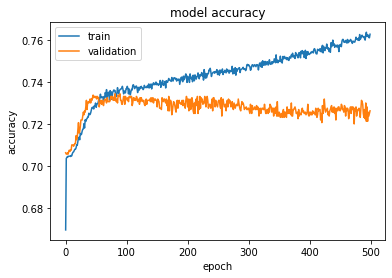

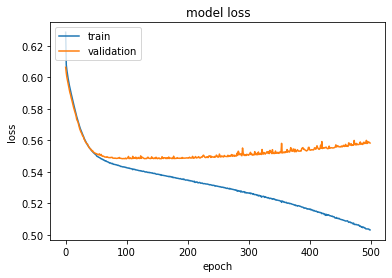

In [ ]:
#  "Accuracy"
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
model_basic.save('Basic_model.h5')

## Model with dropout

In [ ]:
import keras
from keras import layers
model = keras.Sequential()

model.add(keras.layers.Dense(128, activation='relu', input_dim=X.shape[1]))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               7936      
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 16)                5

In [ ]:
history = model.fit(X_train, y_train, batch_size=32, epochs=100, verbose=1, validation_split=0.2)

Epoch 1/100
185/185 [==============================] - 19s 9ms/step - loss: 0.9165 - accuracy: 0.4807 - val_loss: 0.7265 - val_accuracy: 0.5027
Epoch 2/100
185/185 [==============================] - 1s 4ms/step - loss: 0.8429 - accuracy: 0.4795 - val_loss: 0.7035 - val_accuracy: 0.5142
Epoch 3/100
185/185 [==============================] - 1s 4ms/step - loss: 0.7827 - accuracy: 0.5041 - val_loss: 0.6977 - val_accuracy: 0.5122
Epoch 4/100
185/185 [==============================] - 1s 4ms/step - loss: 0.7673 - accuracy: 0.5011 - val_loss: 0.6966 - val_accuracy: 0.4939
Epoch 5/100
185/185 [==============================] - 1s 4ms/step - loss: 0.7556 - accuracy: 0.5039 - val_loss: 0.6967 - val_accuracy: 0.5109
Epoch 6/100
185/185 [==============================] - 1s 4ms/step - loss: 0.7544 - accuracy: 0.5047 - val_loss: 0.6973 - val_accuracy: 0.5088
Epoch 7/100
185/185 [==============================] - 1s 4ms/step - loss: 0.7582 - accuracy: 0.4831 - val_loss: 0.6981 - val_accuracy: 0.504

In [ ]:
score = model.evaluate(X_test, y_test, verbose=1)

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

58/58 [==============================] - 0s 2ms/step - loss: 0.6920 - accuracy: 0.5228
Test Score: 0.6919859647750854
Test Accuracy: 0.5228012800216675


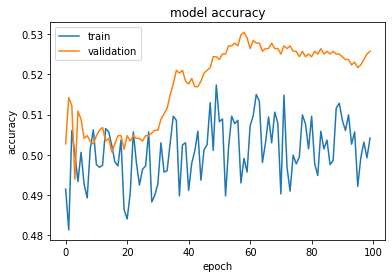

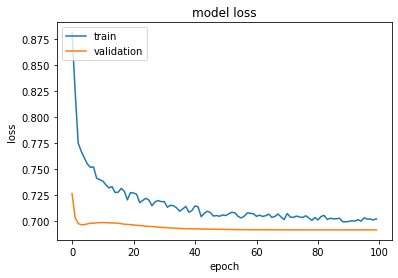

In [ ]:
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
model.save('model.h5')